<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

# Summations and Areas

The aim of this notebook is to put the work with summations to use in finding the area under a curve.  We start with a simple function that returns integer values.  From here we use our knowledge of summations to determine the area under the curve.

### `np.ceil` and Step Functions

The `np.ceil` function returns the "ceiling" of values in an interval.  This means the integer value that is closest above all the values in the interval.  For example, the ceiling of numbers between 0 and 1 is 1, between 1 and 2 is 2, etc.

These functions look like staircases, and provide a nice example for how to use rectangles to determine the area under the curve.  In the example of the step function, we get an exact answer for the area because of the stairstep geometry.  We will take this exact answer and use it to approximate solutions to more complicated curves.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd

In [2]:
x = np.linspace(0, 10, 1000)
def step(x):
    return np.ceil(x)

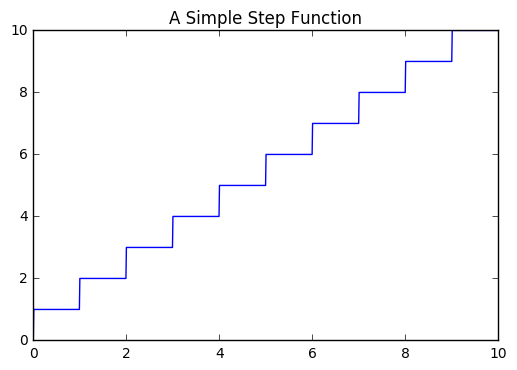

In [3]:
plt.plot(x, step(x))
plt.title("A Simple Step Function")

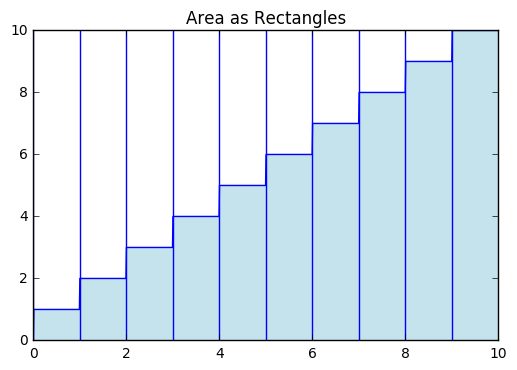

In [4]:
n = np.arange(0, 10, 1)
plt.plot(x, step(x))
plt.fill_between(x, step(x), alpha = 0.7, color = "lightblue")
plt.title("Area as Rectangles")

for xc in n:
    plt.axvline(x=xc)

### Connection to Summation

Now, we see that this comes down to finding the areas of 10 rectangles.  The forumla for the area of a rectangle is $A = l \times w$, so we have the area under the curve as:

$$\text{Area under step function} = 1\times(1) + 1\times(2) + 1\times(3) + ... 1\times(10)$$

$$1 + 2 + 3 + ... + 10$$

We recognize this sum from before.  We know how to compute this sum, and in fact, the sum for any number $n$!.  Hence, for $n = 10$, the area is:

$$\frac{10(11)}{2}$$

If we were asked for the area under the same curve but from $x = 4$ to $x = 20$, what would the area be?

### Different Heights of Rectangles

We can easily extend the problem to involve step functions whose inputs are as follows:

```python
def step2(x):
    return x**2
```

In [5]:
def step2(x):
    return np.ceil(x)**2

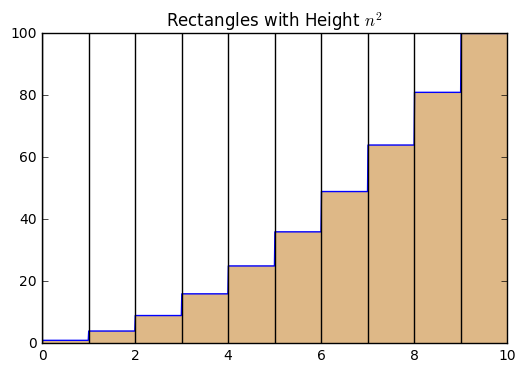

In [6]:
plt.plot(x, step2(x))
plt.fill_between(x, step2(x), color = "burlywood")
plt.title("Rectangles with Height $n^2$")

for xc in n:
    plt.axvline(x=xc, color = "black")

Again, we can use our knowledge about summations to determine the area under the curve here.  

$$\text{Area Under Step(10)}^2 = 1 \times 1^2 + 1 \times 2^2 + 1 \times 3^2 + ... + 1 \times 10^2$$

$$ = 1^2 + 2^2 + 3^2 + ... + 10^2$$

In [7]:
x, n = sy.symbols('x n')
sy.summation(x**2, (x, 1, 10))

385

In [8]:
sy.pprint(sy.summation(x**2, (x, 1, n)))

 3    2    
n    n    n
── + ── + ─
3    2    6


### Continuous Functions

We can use these patterns to approximate the area underneath other functions.  Both of the examples above could be used to approximate the area under the $f(x) = x$ and $g(x) = x^2$.  By superimposing these curves we can see the connection to approximating with rectangles.

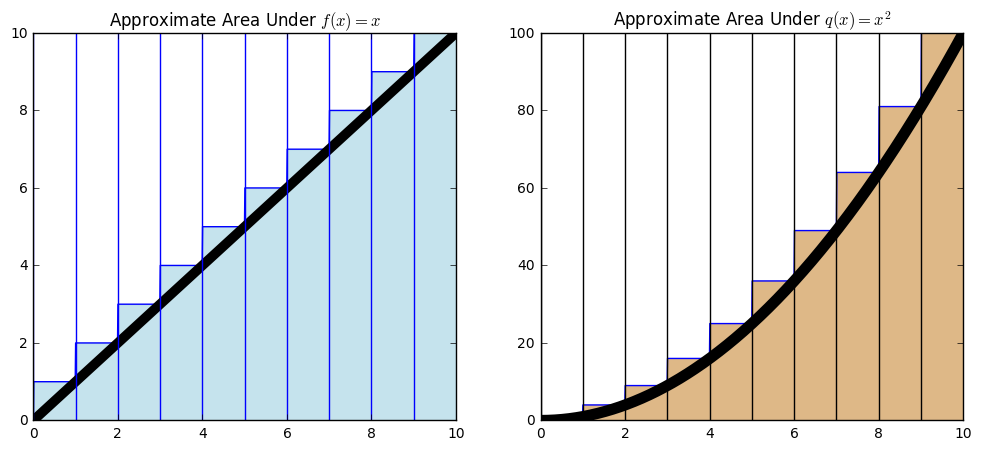

In [9]:
n = np.arange(0, 10, 1)
x = np.linspace(0, 10, 1000)


plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.plot(x, step(x))
plt.plot(x, x, lw = 7, c = "black")
plt.fill_between(x, step(x), alpha = 0.7, color = "lightblue")
plt.title("Approximate Area Under $f(x) = x$")

for xc in n:
    plt.axvline(x=xc)

plt.subplot(122)
plt.plot(x, step2(x))
plt.plot(x, x**2, lw = 8, c = "black")
plt.fill_between(x, step2(x), color = "burlywood")
plt.title("Approximate Area Under $q(x) = x^2$")

for xc in n:
    plt.axvline(x=xc, color = "black")

Combining our above results with these images, we can say that 10 rectanges approximates the area from $x = 0$ to $x = 10$ for $f(x) = x$ as 55, and for $g(x)$ as 385.  We want to improve these approximations.

#### Improving the Approximations

We can get a better approximation in each of the above examples by using more rectangles. Let's begin by considering the case of the same functions and intervals, however now we want to use 20 rectangles.  First, let us determine the width of the rectangles.

Assuming the rectangles are the same width, we will have 20 rectangles over 10 spaces, so each will be 1/2 a unit wide in both cases.

Now, the height of the rectangles.  These are not all the same.  For $f(x) = x$, the first rectangle would be 1/2 tall.  The second would be 2/2, third 3/2, fourth 4/2, etc.

We can make lists for each of these using Python instead of writing them all out.  Let's use Pandas to make a table of the results, and look at the first five rows.  We do this with the `pd.DataFrame()` command that combines the list into the table that we name `df`.  Then, we display the top of the table with the `df.head()` command.


In [10]:
width = [0.5 for i in range(20)]
height = [(i+1)/2 for i in range(20)]

In [11]:
df = pd.DataFrame({"Width": width, "Height": height})

In [12]:
df.head()

,Height,Width
0,0.5,0.5
1,1.0,0.5
2,1.5,0.5
3,2.0,0.5
4,2.5,0.5


Now, we can compute the areas by multiplying each element together.  Below, we create a list of areas and add a column named "Areas" to the DataFrame.

In [13]:
areas = [(width[i]*height[i]) for i in range(20)]
df["Areas"] = areas
df.head()

,Height,Width,Areas
0,0.5,0.5,0.25
1,1.0,0.5,0.50
2,1.5,0.5,0.75
3,2.0,0.5,1.00
4,2.5,0.5,1.25


Similarly, we can sum our list to calculate the updated approximation.  

In [14]:
sum(areas)

52.5

Let's see what happens if we approximate this region with 40 rectangles.  



In [15]:
width = [10/40 for i in range(40)]
height = [(i+1)/4 for i in range(40)]

In [16]:
areas_40 = [(width[i] * height[i]) for i in range(40)]
sum(areas_40)

51.25

### More Complex Curves

Suppose we wanted to approximate the area under the curve $h(x) = (x-1)(x-4)(x-5)$ from $x = 0$ to $x = 5$ as shown below.  First we use 10, then 20, 40, 100, and 1,000,000 rectangles to approximate this and compare our answers, and consider the best way to find  areas using rectangles.

In [17]:
def h(x):
    return (x - 1)*(x - 4)*(x - 5)

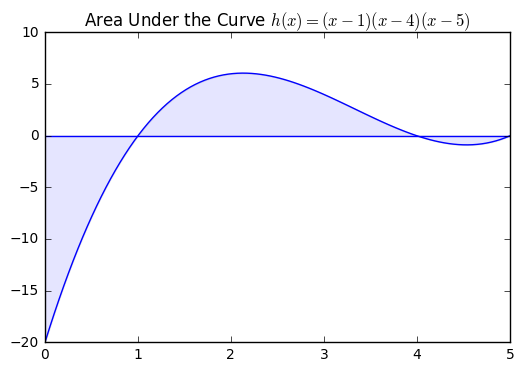

In [18]:
x = np.linspace(0, 5, 100)
plt.plot(x, h(x))
plt.fill_between(x, h(x), alpha = 0.1)
plt.axhline()
plt.title("Area Under the Curve $h(x) = (x-1)(x-4)(x-5)$")

#### 10 Rectangles

Over an interval of width 5, with 10 rectangles each would have width 1/2.  You should notice the general approach for the width of the rectangles by now as the length of the interval divided by the number of rectangles.  

Also, with a more complex curve like this example, we want to find an easy way to determine the heights of the rectangles.  The rectangles occur every 1/2 a unit.  The height of the first rectangle would be at f(1/2), the second at f(2/2), the third at f(3/2), ... up to f(9/2), f(10/2).  

There is a pattern to the heights.  Every one is an integer multiple of the width.  Hence, we have a loose definition for our approximation under the curve $h(x)$ on the interval [0, 5] as:

Area = width times height

Area = (5/10) times [f(i/2) for i = 1, 2, 3, ..., 10]

We can easily implement this logic with Python and our list structures.

In [19]:
width = [5/10 for i in range(10)]
height = [h(5/10*i) for i in range(10)]
area = [(width[i] * height[i]) for i in range(10)]
sum(area)

-3.4375

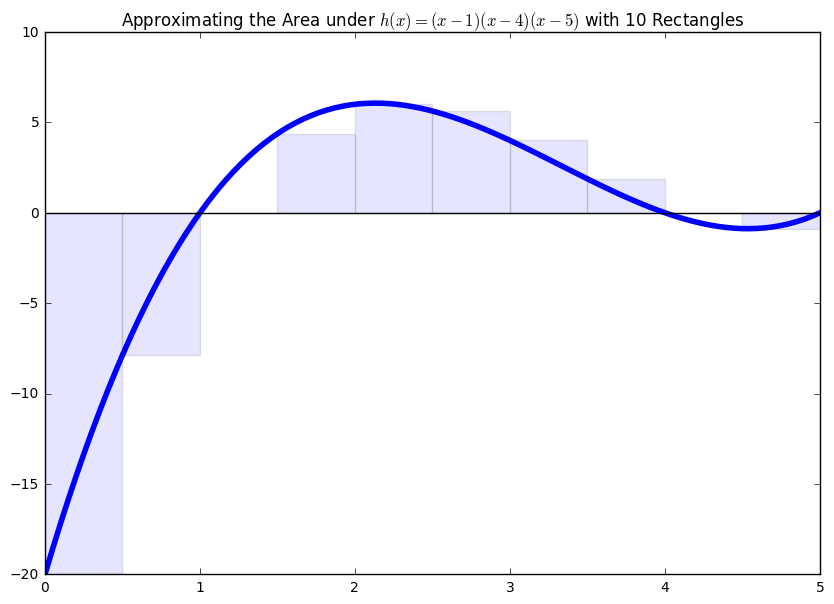

In [20]:
plt.figure(figsize = (10, 7))
n = np.arange(0, 5, .5)
plt.plot(x, h(x), linewidth = 4)
plt.axhline(color = 'black')
plt.bar(n, height, width = 0.5, alpha = 0.1)
plt.title("Approximating the Area under $h(x) = (x-1)(x-4)(x-5)$ with 10 Rectangles")

#### 20 Rectangles

In [21]:
width2 = [5/20 for i in range(20)]
height2 = [h(5/20*i) for i in range(20)]
area2 = [(width2[i] * height2[i]) for i in range(20)]
sum(area2)

-0.546875

#### 40 Rectangles

In [22]:
width3 = [5/40 for i in range(40)]
height3 = [h(5/40*i) for i in range(40)]
area3 = [(width3[i] * height3[i]) for i in range(40)]
sum(area3)

0.80078125

#### 100 Rectangles



In [23]:
width4 = [5/100 for i in range(100)]
height4 = [h(5/100*i) for i in range(100)]
area4 = [(width4[i] * height4[i]) for i in range(100)]
sum(area4)

1.5781250000000033

#### 1,000,000 Rectangles

In [24]:
width5 = [5/100000 for i in range(100000)]
height5 = [h(5/100000*i) for i in range(100000)]
area5 = [(width5[i] * height5[i]) for i in range(100000)]
sum(area5)

2.08283332812496